In [1]:
import json
from glob import glob
from tqdm import tqdm
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
path = "/Users/piotrmigdal/datasets/ggtracker/matches_6555_sampled_meta/"

In [3]:
filenames = glob(path + "*")

In [4]:
matches = []
for filename in tqdm(filenames):
    with open(filename) as f:
        matches.append(json.load(f))

In [9]:
matches[2]

{'average_league': 4,
 'category': 'Ladder',
 'cobrand': None,
 'duration_seconds': 1719,
 'ended_at': '2012-10-13T21:41:42+00:00',
 'entities': [],
 'expansion': 0,
 'game_type': '2v2',
 'id': 100202,
 'map': {},
 'map_name': None,
 'map_url': None,
 'release_string': None,
 'replays': [],
 'replays_count': 0,
 'summaries_count': 1,
 'winning_team': 2}

In [6]:
len([match for match in matches if "entities" not in match])

278

In [12]:
278/6555

0.042410373760488174

In [7]:
len([match for match in matches if len(match.get("entities", [])) > 0])

3616

In [8]:
3616/6555

0.5516399694889398

In [21]:
[match for match in matches if len(match.get("entities", [])) == 0
                            and match.get("game_type") == "1v1"][-5:]

[{'average_league': 2,
  'category': 'Ladder',
  'cobrand': None,
  'duration_seconds': 1262,
  'ended_at': '2013-01-11T05:13:24+00:00',
  'entities': [],
  'expansion': 0,
  'game_type': '1v1',
  'id': 989202,
  'map': {},
  'map_name': None,
  'map_url': None,
  'release_string': None,
  'replays': [],
  'replays_count': 0,
  'summaries_count': 1,
  'winning_team': 2},
 {'average_league': 2,
  'category': 'Ladder',
  'cobrand': None,
  'duration_seconds': 3,
  'ended_at': '2012-11-22T08:19:37+00:00',
  'entities': [],
  'expansion': 0,
  'game_type': '1v1',
  'id': 991202,
  'map': {},
  'map_name': None,
  'map_url': None,
  'release_string': None,
  'replays': [],
  'replays_count': 0,
  'summaries_count': 2,
  'winning_team': 2},
 {'average_league': 3,
  'category': 'Private',
  'cobrand': None,
  'duration_seconds': 1738,
  'ended_at': '2013-01-14T20:54:21+00:00',
  'entities': [],
  'expansion': 0,
  'game_type': '1v1',
  'id': 992202,
  'map': {},
  'map_name': None,
  'map_url

In [16]:
[match for match in matches if "entities" not in match][:3]

[{'error': 'Not Found', 'status': 'error'},
 {'error': 'Not Found', 'status': 'error'},
 {'error': 'Not Found', 'status': 'error'}]

In [8]:
df = pd.DataFrame(matches)

In [9]:
df.head()

,average_league,category,cobrand,duration_seconds,ended_at,entities,error,expansion,game_type,id,map,map_name,map_url,release_string,replays,replays_count,status,summaries_count,winning_team
0,3.0,Ladder,NaN,1342.0,2013-01-13T01:25:07+00:00,[],NaN,0.0,4v4,1000202.0,{},None,None,None,[],0.0,NaN,1.0,1.0
1,2.0,Ladder,NaN,1705.0,2012-12-17T22:56:25+00:00,[],NaN,0.0,3v3,1001202.0,{},None,None,None,[],0.0,NaN,1.0,2.0
2,4.0,Ladder,NaN,1719.0,2012-10-13T21:41:42+00:00,[],NaN,0.0,2v2,100202.0,{},None,None,None,[],0.0,NaN,1.0,2.0
3,2.0,Ladder,NaN,2084.0,2012-12-15T05:02:18+00:00,[],NaN,0.0,4v4,1002202.0,{},None,None,None,[],0.0,NaN,1.0,1.0
4,5.0,Ladder,NaN,1326.0,2013-01-10T09:59:23+00:00,[],NaN,0.0,2v2,1003202.0,{},None,None,None,[],0.0,NaN,1.0,2.0


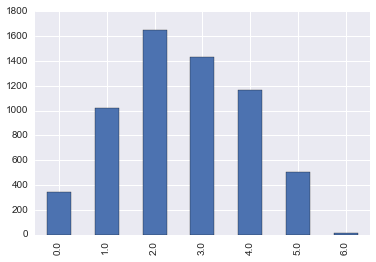

In [10]:
df.average_league.value_counts().sort_index().plot(kind="bar")

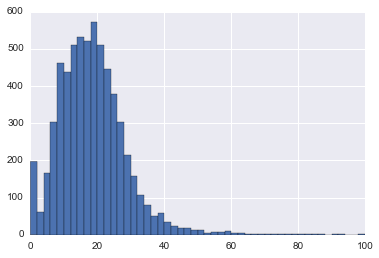

In [11]:
(df.duration_seconds / 60).hist(bins=50, range=(0,100))

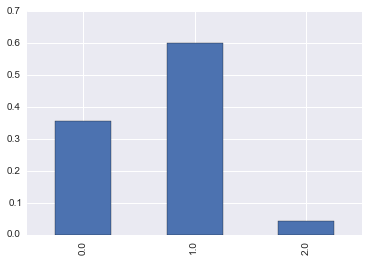

In [22]:
df.expansion.value_counts(normalize=True).sort_index().plot(kind="bar")

In [21]:
df.expansion.value_counts?

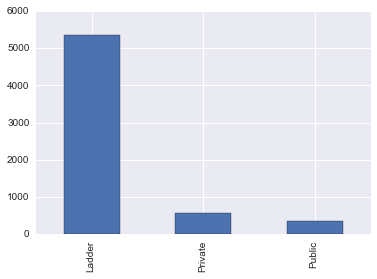

In [20]:
df.category.value_counts().plot(kind="bar")

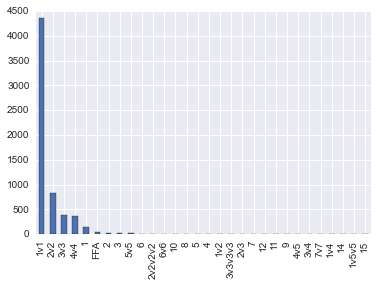

In [19]:
df.game_type.value_counts().plot(kind="bar")

In [14]:
df["date"] = pd.to_datetime(df.ended_at)
df = df[pd.notnull(df["date"])]

In [15]:
df["date_y"] = df["date"].apply(lambda x: x.toordinal())

expansion
0.0    Axes(0.125,0.125;0.775x0.775)
1.0    Axes(0.125,0.125;0.775x0.775)
2.0    Axes(0.125,0.125;0.775x0.775)
Name: date_y, dtype: object

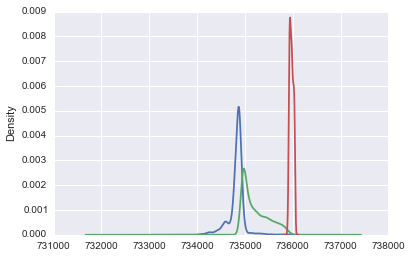

In [16]:
df.groupby("expansion").date_y.plot("kde")

expansion
0.0    Axes(0.125,0.125;0.775x0.775)
1.0    Axes(0.125,0.125;0.775x0.775)
2.0    Axes(0.125,0.125;0.775x0.775)
Name: date_y, dtype: object

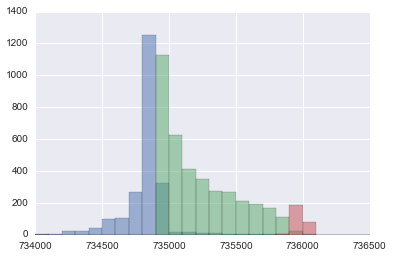

In [17]:
df.groupby("expansion").date_y.hist(alpha=0.5, range=(734000, 736500), bins=25)

/usr/local/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


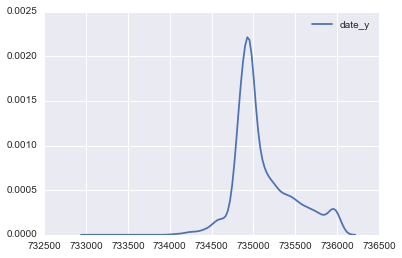

In [18]:
sns.kdeplot(df["date_y"])

In [39]:
df1v1 = df[(df.game_type == "1v1") & df.entities.apply(lambda x: len(x) == 2)].copy()

In [40]:
matches[-1000]["entities"][0]["identity"]["current_league_1v1"]

5

In [41]:
df1v1["league1"] = df1v1.entities.apply(lambda x: x[0]["identity"]["current_league_1v1"])
df1v1["league2"] = df1v1.entities.apply(lambda x: x[1]["identity"]["current_league_1v1"])

In [42]:
df1v1.columns

Index(['average_league', 'category', 'cobrand', 'duration_seconds', 'ended_at',
       'entities', 'error', 'expansion', 'game_type', 'id', 'map', 'map_name',
       'map_url', 'release_string', 'replays', 'replays_count', 'status',
       'summaries_count', 'winning_team', 'date', 'date_y', 'league1',
       'league2'],
      dtype='object')

In [48]:
who_won = pd.pivot_table(df1v1, index="league1", columns="league2", values="winning_team",
                         aggfunc="mean") - 1
who_won_count = pd.pivot_table(df1v1, index="league1", columns="league2", values="winning_team",
                               aggfunc="count") - 1

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


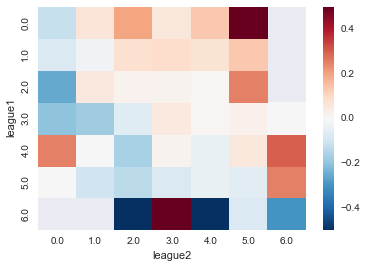

In [47]:
sns.heatmap(who_won - 0.5)

/usr/local/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


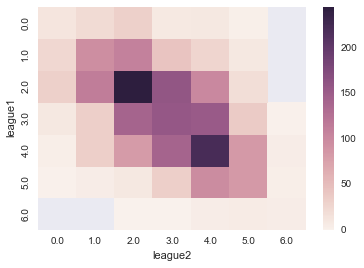

In [49]:
sns.heatmap(who_won_count)